In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import re
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/bhanu/Downloads/Semseter 4/Capstone 2/code/US_Accidents_March23_sampled_500k.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (500000, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [4]:
def sniff(df):
        info = pd.DataFrame()
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('percent missing')

sniff(df)

,percent missing
ID,0.0000
Amenity,0.0000
Give_Way,0.0000
Junction,0.0000
No_Exit,0.0000
Railway,0.0000
Roundabout,0.0000
Station,0.0000
Stop,0.0000
Traffic_Calming,0.0000


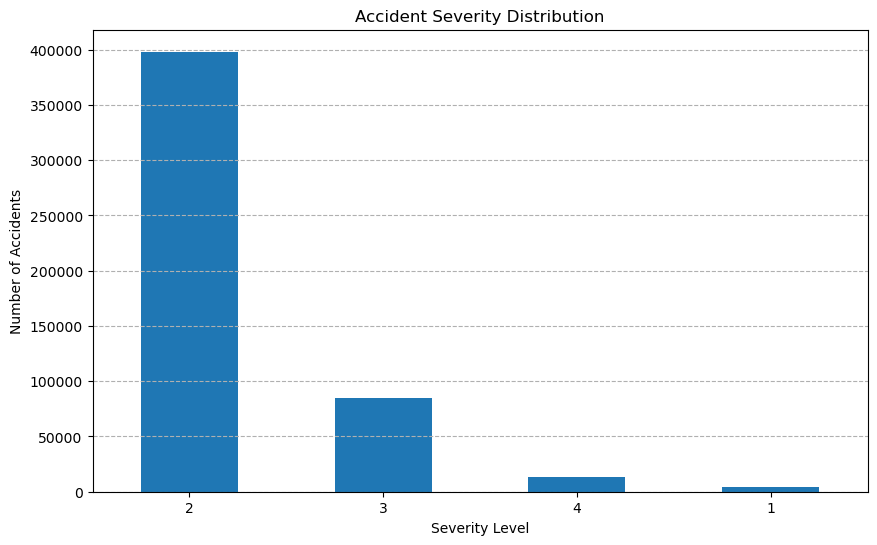

In [5]:
# Calculate the count of accidents by severity
severity_counts = df['Severity'].value_counts()

# Plotting the severity counts as a bar chart
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

In [6]:
import pandas as pd

# Merging severity levels: 1 and 2 into 0, 3 into 1, and 4 into 2
severity_mapping = {1: 0, 2: 0, 3: 1, 4: 2}
df['Severity_Merged'] = df['Severity'].map(severity_mapping)

# Separate the dataset into the three classes based on the new severity mapping
df_minor = df[df['Severity_Merged'] == 0]
df_moderate = df[df['Severity_Merged'] == 1]
df_severe = df[df['Severity_Merged'] == 2]

# Calculate the minimum number of samples among all severity classes
min_samples = min(len(df_minor), len(df_major), len(df_severe))

# Undersample each severity class to the minimum number of samples
df_minor_undersampled = resample(df_minor,
                               replace=False,
                               n_samples=min_samples,
                               random_state=123)
df_major_undersampled = resample(df_major,
                               replace=False,
                               n_samples=min_samples,
                               random_state=123)
df_severe_undersampled = resample(df_severe,
                                replace=False,
                                n_samples=min_samples,
                                random_state=123)

# Combine the undersampled majority classes with the minority class
df = pd.concat([df_minor_undersampled, df_major_undersampled, df_severe_undersampled])

# Verifying the balance in the new DataFrame
final_severity_counts = df['Severity_Merged'].value_counts()
final_severity_counts

Severity_Merged
0    13064
1    13064
2    13064
Name: count, dtype: int64

In [7]:
# Fix datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')

In [8]:
df = df.drop(['ID','Description','Distance(mi)', 'End_Time',
              'End_Lat', 'End_Lng'], axis=1)

In [9]:
cat_names = ['Country', 'Timezone', 'Amenity', 'Bump', 'Crossing',
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 1
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [10]:
#Drop 'Country' and 'Turning_Loop' for they have only one class.
df = df.drop(['Country','Turning_Loop'], axis=1)

In [11]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['North' 'SSW' 'CALM' 'South' 'SE' 'WNW' nan 'Calm' 'NE' 'NW' 'NNW' 'SSE'
 'ENE' 'VAR' 'WSW' 'W' 'E' 'West' 'N' 'NNE' 'ESE' 'S' 'SW' 'Variable'
 'East']


In [12]:
#count of missing value in "wind_direction" coloumn
missing_values_count= df['Wind_Direction'].isnull().sum()
print("Number of missing values in 'Wind Direction' column:", missing_values_count)

Number of missing values in 'Wind Direction' column: 952


In [13]:
#finding unique missing value in "wind_direction" coloumn
missing_values = df['Wind_Direction'][df['Wind_Direction'].isnull()]
unique_missing_values = missing_values.unique()
print("Missing values in 'Wind Direction' column:")
print(unique_missing_values)

Missing values in 'Wind Direction' column:
[nan]


In [14]:
# Simplify wind direction

df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE')|(df['Wind_Direction']=='SE')|(df['Wind_Direction']=='SW'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE')|(df['Wind_Direction']=='NE')|(df['Wind_Direction']=='NW'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())


Wind Direction after simplification:  ['N' 'S' 'CALM' 'W' nan 'E' 'VAR']
